In [2]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

(30, 10)
[[ 1.00000000e+00 -6.28318531e+00  3.94784176e+01 -2.48050213e+02
   1.55854546e+03 -9.79262991e+03  6.15289084e+04 -3.86597533e+05
   2.42906394e+06 -1.52622589e+07]
 [ 1.00000000e+00 -5.84986218e+00  3.42208876e+01 -2.00187476e+02
   1.17106915e+03 -6.85059310e+03  4.00750255e+04 -2.34433376e+05
   1.37140294e+06 -8.02251821e+06]
 [ 1.00000000e+00 -5.41653906e+00  2.93388954e+01 -1.58915273e+02
   8.60770781e+02 -4.66239856e+03  2.52540639e+04 -1.36789623e+05
   7.40926338e+05 -4.01325645e+06]]


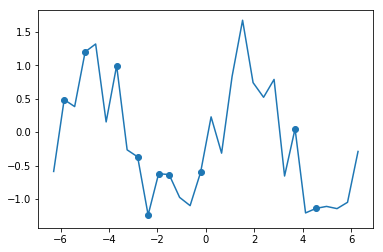

In [3]:
N = 30
X = np.linspace(-np.pi*2, np.pi*2, N).reshape(N, 1)
y = np.sin(X) + 0.5*np.random.randn(N, 1)

plt.plot(X, y)

PHI = np.ones(X.shape[0]).reshape(-1, 1)
for i in range(1, 10):
    PHI = np.concatenate((PHI, np.power(X, i)), axis=1)
print(PHI.shape)
print(PHI[:3])

idx = np.random.permutation(N)
X_ = X[idx]
PHI_ = PHI[idx]
y_ = y[idx]

X_train = X_[:-20]
PHI_train = PHI_[:-20]
y_train = y_[:-20]
plt.scatter(X_train, y_train)

plt.show()

# trian with
PHI_train, y_train
# plot with
X_train, y_train
X, y

In [88]:
learning_rate = 0.001
training_epochs = 1000
display_step = 50

reg_lambda = 0.3

n_samples = PHI_train.shape[0]

In [89]:
X = tf.placeholder('float', shape=[None, 10])
Y = tf.placeholder('float')

W = tf.Variable(tf.random_normal([10, 1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

pred = tf.add(tf.matmul(X, W), b)

obj = tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * n_samples) \
    + reg_lambda * tf.reduce_sum(tf.pow(W, 2)) / (2 * n_samples)
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(obj)

In [90]:
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

for epoch in range(0, training_epochs):
    for x, y in zip(PHI_train, y_train):
        sess.run(optimizer, feed_dict={X: x.reshape(1, -1), Y: y})
    if (epoch + 1) % display_step == 0:
        print("Epoch: ", epoch + 1)

print("최적화 완료") 
print("학습 손실 = ", sess.run(obj, feed_dict={X: PHI_train, Y: y_train})) 
print("W = ", sess.run(W))
print("b = ", sess.run(b))

weight = sess.run(W)
bias = sess.run(b)

Epoch:  50
Epoch:  100
Epoch:  150
Epoch:  200
Epoch:  250
Epoch:  300
Epoch:  350
Epoch:  400
Epoch:  450
Epoch:  500
Epoch:  550
Epoch:  600
Epoch:  650
Epoch:  700
Epoch:  750
Epoch:  800
Epoch:  850
Epoch:  900
Epoch:  950
Epoch:  1000
최적화 완료
학습 손실 =  39928810.0
W =  [[-2.4839435 ]
 [ 2.1768036 ]
 [-3.1612225 ]
 [ 2.8770308 ]
 [-3.4006605 ]
 [ 1.3237256 ]
 [-1.2310737 ]
 [-1.516832  ]
 [ 0.11138366]
 [ 0.05610272]]
b =  [-2.0897996]


In [95]:
X = np.linspace(-np.pi*2, np.pi*2, N).reshape(N, 1)

y = bias[0] * np.power(X, 0) +weight[0,0] * np.power(X, 1) +\
weight[1,0] * np.power(X, 2) +\
weight[2,0] * np.power(X, 3) +\
weight[3,0] * np.power(X, 4) +\
weight[4,0] * np.power(X, 5) +\
weight[5,0] * np.power(X, 6) +\
weight[6,0] * np.power(X, 7) +\
weight[7,0] * np.power(X, 8) +\
weight[8,0] * np.power(X, 9) +\
weight[9,0] * np.power(X, 10)

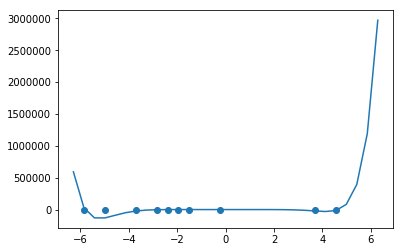

In [96]:
plt.plot(X, y)

plt.scatter(X_train, y_train)

plt.show()